In [1]:
from ase.io import read
import numpy as np

def RMSE(L, type):
    print(f'L{L} {type}')
    configs = read(f'tests/L{L}_test_{type}.xyz', index=':')
    diff_E = [ config.info['energy'] - config.info['MACE_energy'] for config in configs ]
    diff_F = [ config.arrays['forces'] - config.arrays['MACE_forces'] for config in configs ]
    print(f'RMSE E: {np.sqrt(np.mean(np.square(diff_E))) * 1000:.1f} meV')
    print(f'RMSE F: {np.sqrt(np.mean(np.square(diff_F))) * 1000:.1f} meV/Å\n')

for type in ['300K', '600K', '1200K', 'dih']:
    RMSE(2, type)

L2 300K
RMSE E: 2.4 meV
RMSE F: 9.9 meV/Å

L2 600K
RMSE E: 11.0 meV
RMSE F: 25.3 meV/Å

L2 1200K
RMSE E: 36.9 meV
RMSE F: 81.9 meV/Å

L2 dih
RMSE E: 16.5 meV
RMSE F: 19.9 meV/Å



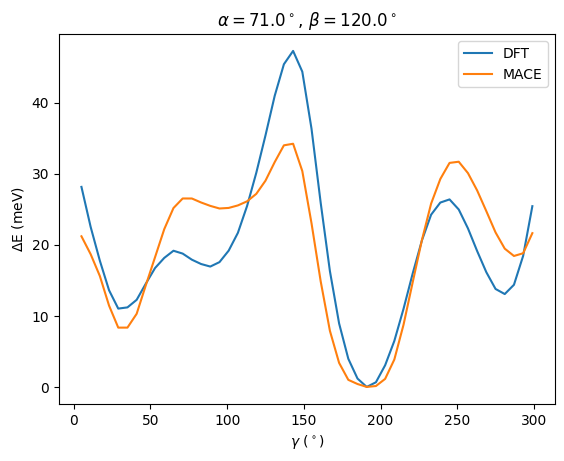

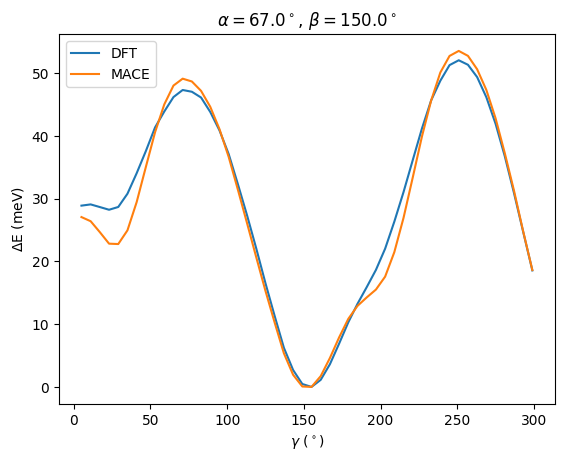

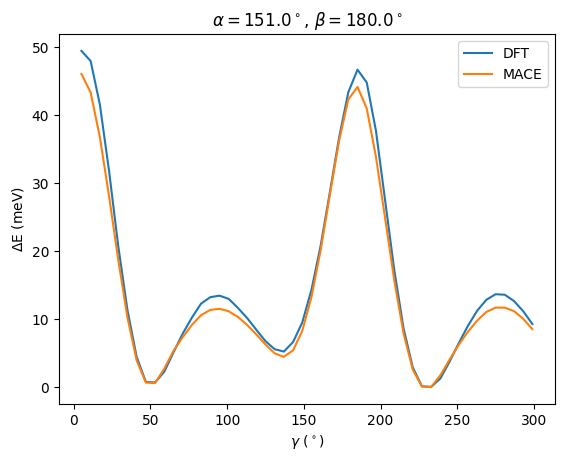

In [2]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt

def dihedral(alpha, beta):
    configs = read('./tests/L2_test_dih.xyz', index=':')
    config_alpha_beta = []
    for config in configs:
        if config.info['dihedrals'][0] == alpha and config.info['dihedrals'][1] == beta:
            config_alpha_beta.append(config)

    energy = [ config.info['energy'] for config in config_alpha_beta ]
    energy = (energy - np.min(energy)) * 1000
    MACE_energy = [ config.info['MACE_energy'] for config in config_alpha_beta ]
    MACE_energy = (MACE_energy - np.min(MACE_energy)) * 1000
    dihedrals = [ config.info['dihedrals'][2] for config in config_alpha_beta ]
    plt.plot(dihedrals, energy, label='DFT')
    plt.plot(dihedrals, MACE_energy, label='MACE')
    plt.xlabel('$\gamma$ ($^\circ$)')
    plt.ylabel('$\Delta$E (meV)')
    plt.legend()
    plt.title(f'$\\alpha = {alpha}^\circ$, $\\beta = {beta}^\circ$')
    plt.show()

dihedral(71.0, 120.0)
dihedral(67.0, 150.0)
dihedral(151.0, 180.0)

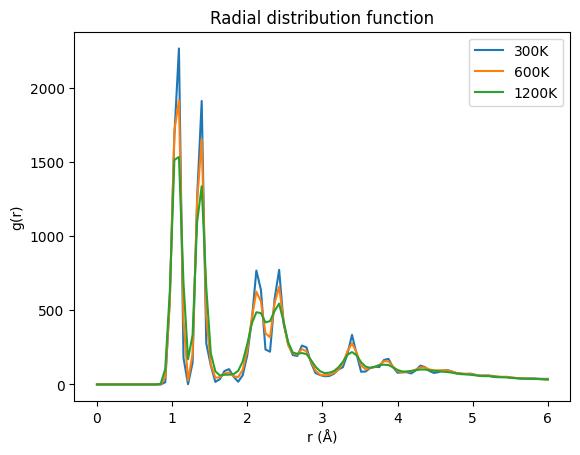

In [3]:
from ase.io import read
from ase.geometry.analysis import Analysis
import numpy as np
import matplotlib.pyplot as plt

def plot(temp, pre):
    configs = read(f'{pre}{temp}K.xyz', index=':')
    rmax = 6.0
    nbins = 100
    rdf = np.sum(Analysis(configs).get_rdf(rmax=rmax, nbins=nbins), axis=0) / len(configs)
    plt.plot(np.linspace(0, rmax, nbins), rdf, label=f'{temp}K')

plot(300, './dataset/test_')
plot(600, './dataset/test_')
plot(1200, './dataset/test_')
plt.title('Radial distribution function')
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.legend()
plt.show()